# Data Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(8.0,6.0)})

In [2]:
data = pd.read_csv('../data/training/train.csv',index_col=0, parse_dates=True)

In [3]:
pa_data = data.dropna()

In [4]:
data = data.fillna(0)

In [5]:
data['date_val'] = pd.to_datetime(data['date_val'])

In [6]:
#data = data.drop(columns=['calendar_year','calendar_month','calendar_day'])

In [7]:
data

,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,dim_claim_id,bin,drug,reject_code,pharmacy_claim_approved,dim_pa_id,correct_diagnosis,tried_and_failed,contraindication,pa_approved,dim_date_id
106328,2017-04-07,2017,4,7,6,1,1,0,106329,999001,A,0,1,0.0,0.0,0.0,0.0,0.0,0.0
31702,2017-01-30,2017,1,30,2,1,1,0,31703,999001,C,0,1,0.0,0.0,0.0,0.0,0.0,0.0
1270970,2019-11-11,2019,11,11,2,1,1,0,1270971,417740,B,70,0,528977.0,1.0,1.0,0.0,0.0,1045.0
1093403,2019-06-28,2019,6,28,6,1,1,0,1093404,999001,A,76,0,454463.0,1.0,0.0,0.0,1.0,909.0
61846,2017-02-27,2017,2,27,2,1,1,0,61847,999001,A,0,1,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,2017-04-11,2017,4,11,3,1,1,0,110269,417380,C,70,0,45579.0,1.0,1.0,0.0,1.0,101.0
259178,2017-09-03,2017,9,3,1,0,0,0,259179,999001,A,0,1,0.0,0.0,0.0,0.0,0.0,0.0
131932,2017-05-02,2017,5,2,3,1,1,0,131933,999001,A,0,1,0.0,0.0,0.0,0.0,0.0,0.0
671155,2018-08-14,2018,8,14,3,1,1,0,671156,999001,C,0,1,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
data.isna().any()

date_val                   False
calendar_year              False
calendar_month             False
calendar_day               False
day_of_week                False
is_weekday                 False
is_workday                 False
is_holiday                 False
dim_claim_id               False
bin                        False
drug                       False
reject_code                False
pharmacy_claim_approved    False
dim_pa_id                  False
correct_diagnosis          False
tried_and_failed           False
contraindication           False
pa_approved                False
dim_date_id                False
dtype: bool

## General Information

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894835 entries, 106328 to 121958
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   date_val                 894835 non-null  datetime64[ns]
 1   calendar_year            894835 non-null  int64         
 2   calendar_month           894835 non-null  int64         
 3   calendar_day             894835 non-null  int64         
 4   day_of_week              894835 non-null  int64         
 5   is_weekday               894835 non-null  int64         
 6   is_workday               894835 non-null  int64         
 7   is_holiday               894835 non-null  int64         
 8   dim_claim_id             894835 non-null  int64         
 9   bin                      894835 non-null  int64         
 10  drug                     894835 non-null  object        
 11  reject_code              894835 non-null  int64         
 12  pharmacy_cl

In [10]:
data.describe()

,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,dim_claim_id,bin,reject_code,pharmacy_claim_approved,dim_pa_id,correct_diagnosis,tried_and_failed,contraindication,pa_approved,dim_date_id
count,894835.000000,894835.000000,894835.000000,894835.000000,894835.000000,894835.000000,894835.000000,8.948350e+05,894835.000000,894835.000000,894835.000000,894835.000000,894835.000000,894835.000000,894835.000000,894835.000000,894835.000000
mean,2018.082193,6.416947,15.748319,4.019238,0.878542,0.864719,0.008236,6.675185e+05,696509.856614,30.316215,0.584074,115563.482591,0.332462,0.208469,0.083617,0.305526,239.400225
std,0.807606,3.456396,8.746217,1.670429,0.326659,0.342023,0.090379,3.856257e+05,290464.391553,35.966063,0.492881,171666.160556,0.471096,0.406214,0.276812,0.460630,347.713712
min,2017.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000e+00,417380.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,3.000000,8.000000,3.000000,1.000000,1.000000,0.000000,3.334375e+05,417614.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,6.000000,16.000000,4.000000,1.000000,1.000000,0.000000,6.674160e+05,417740.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2019.000000,9.000000,23.000000,5.000000,1.000000,1.000000,0.000000,1.001526e+06,999001.000000,70.000000,1.000000,221594.500000,1.000000,0.000000,0.000000,1.000000,480.000000
max,2019.000000,12.000000,31.000000,7.000000,1.000000,1.000000,1.000000,1.335576e+06,999001.000000,76.000000,1.000000,555950.000000,1.000000,1.000000,1.000000,1.000000,1095.000000


### How many drug types?

In [11]:
np.unique(data['drug'])

array(['A', 'B', 'C'], dtype=object)

### How many payers? 

In [12]:
np.unique(data['bin'])

array([417380, 417614, 417740, 999001])

### How many reject codes? 

In [13]:
np.unique(data['reject_code'])

array([ 0, 70, 75, 76])

## Random Questions

### Diagnosis %

### Correct diagnosis % by day of week.

In [14]:
# for these questions only include cases where we have pa data

In [15]:
daily = pa_data.groupby('day_of_week')

In [16]:
daily['correct_diagnosis']

In [17]:
diagnosis_rate = (daily['correct_diagnosis'].sum())/daily['correct_diagnosis'].count()

In [18]:
diagnosis_rate

day_of_week
1    0.801044
2    0.796883
3    0.801247
4    0.800313
5    0.797112
6    0.799811
7    0.800593
Name: correct_diagnosis, dtype: float64

<AxesSubplot:xlabel='day_of_week'>

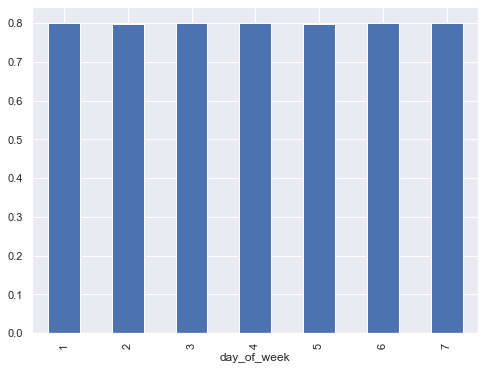

In [19]:
diagnosis_rate.plot.bar(x='day of week', y='val')

### Correct diagnosis % by weekday

In [20]:
daily = pa_data.groupby('is_workday')

In [21]:
diagnosis_rate = (daily['correct_diagnosis'].sum())/daily['correct_diagnosis'].count()

In [22]:
diagnosis_rate

is_workday
0    0.800599
1    0.799132
Name: correct_diagnosis, dtype: float64

<AxesSubplot:xlabel='is_workday'>

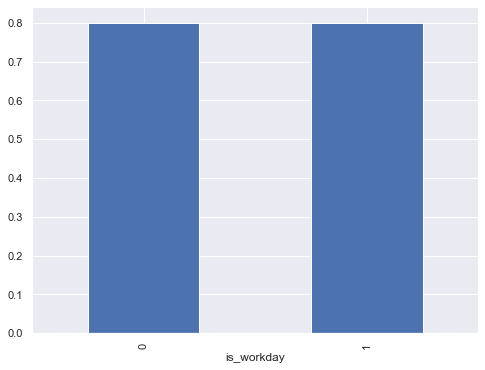

In [23]:
diagnosis_rate.plot.bar(x='day of week', y='val')

### Correct diagnosis % by holiday

In [24]:
daily = pa_data.groupby('is_holiday')

In [25]:
diagnosis_rate = (daily['correct_diagnosis'].sum())/daily['correct_diagnosis'].count()

In [26]:
diagnosis_rate

is_holiday
0    0.799311
1    0.801749
Name: correct_diagnosis, dtype: float64

<AxesSubplot:xlabel='is_holiday'>

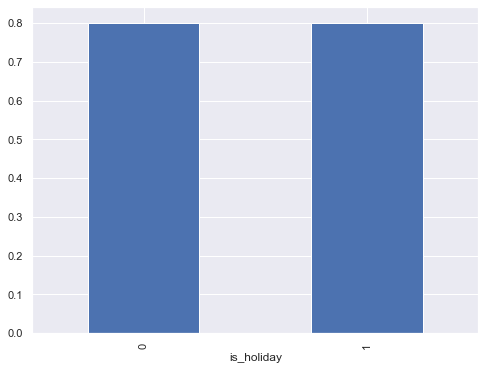

In [27]:
diagnosis_rate.plot.bar(x='is holiday', y='val')

## Analyzing which factors tend to influence whether PAs are likely to be approved or denied.

In [28]:
daily = pa_data.groupby('day_of_week')

## Time Data

In [29]:
pa_monthly_load = pa_data.groupby('calendar_month')['calendar_month'].count()

In [30]:
pa_monthly_load

calendar_month
1     32170
2     30737
3     34021
4     31073
5     31867
6     29458
7     30371
8     31911
9     29037
10    31644
11    29754
12    30142
Name: calendar_month, dtype: int64

<AxesSubplot:xlabel='calendar_month'>

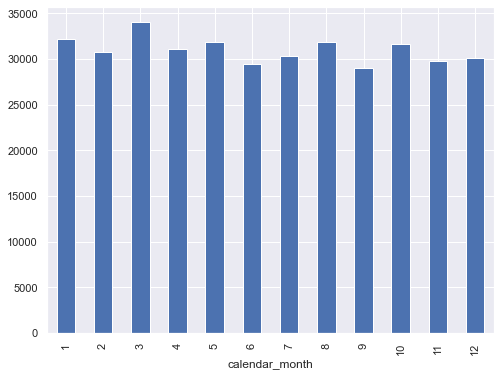

In [31]:
pa_monthly_load.plot.bar(x='calendar_month', y='val')